# 2018 Mashine Learning course at the Faculty of Physics, Astronomy and Applied Computer Science

## Homework no. 1
by Robert Bialy

#### Homework description
Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline


\\( f(x)=cos(\frac{3}{2}\pi x) \\)

In [3]:
def my_first_func(x):
    return np.cos(1.5 * np.pi * x)

\\( f(x)=sin(\frac{3}{2}\pi x*cos(\frac{3}{2}\pi x)) \\)

In [4]:
def my_second_func(x):
    return np.sin(1.5 * np.pi * x * np.cos(1.5 * np.pi * x))

In [5]:
def draw_mse_plot(x, y):
    mse = list()
    std = list()
    plt.figure(figsize=(10, 5))
    for degree in range(1,31): #degree from 1 to 30
        polynomial_features = PolynomialFeatures(degree, include_bias=False)
        linear_regression = LinearRegression() #interpolation
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        scores = cross_val_score(pipeline, x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
        mse.append(-scores.mean()) #mse error
        
    plt.xlabel("degrees", fontsize=14)
    plt.ylabel("mean square error", fontsize=14)
    plt.xlim((0, 30))
    plt.ylim((0, max(mse)))
    plt.plot(range(1,31), mse)
    plt.show()

In [6]:
def get_MSE(funtion, samples, noise_level): #funtion to setup samples and noise level
    x = None
    y = None
    x = np.sort(np.random.rand(samples))
    y = funtion(x) + np.random.randn(samples) * noise_level
    
    draw_mse_plot(x,y)
    del x,y

Samples count = 30
Noise level = 0.1

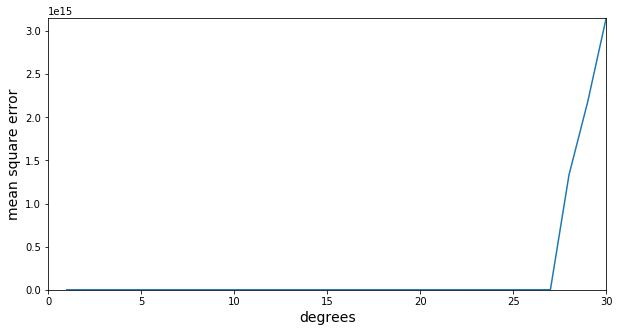

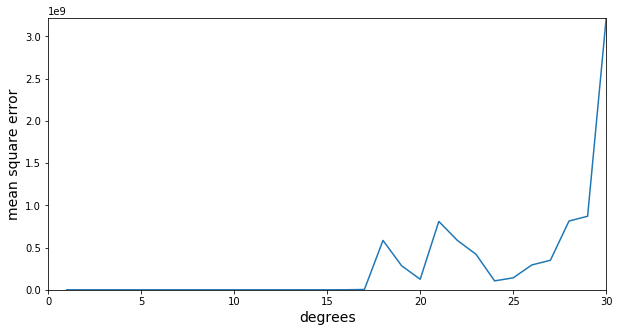

In [10]:
get_MSE(my_first_func, 30, 0.1)
get_MSE(my_second_func, 30, 0.1)

Samples = 30
Noise level = 0.4

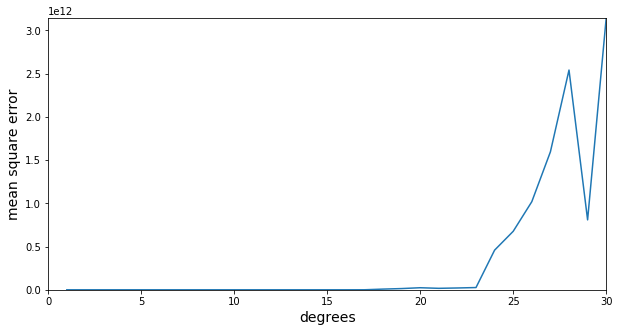

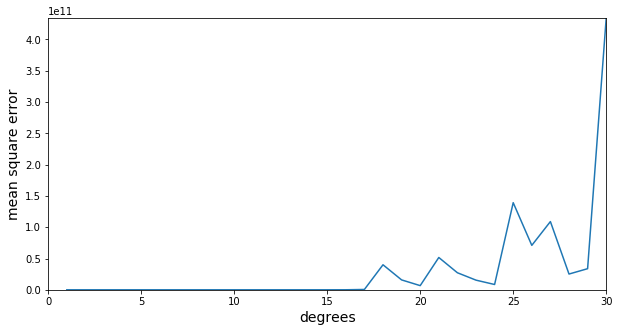

In [8]:
get_MSE(my_first_func, 30, 0.4)
get_MSE(my_second_func, 30, 0.4)

Samples = 100 Noise level = 0.4

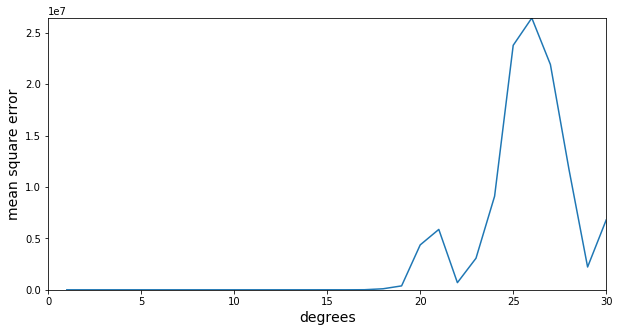

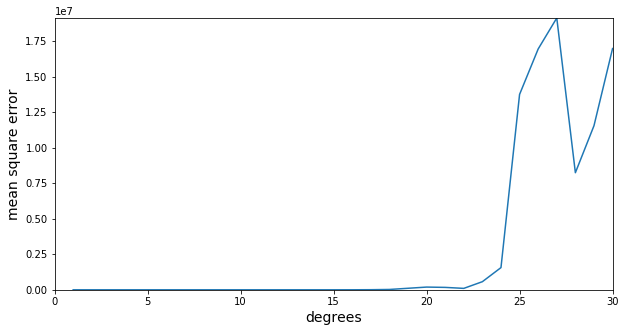

In [9]:
get_MSE(my_first_func, 100, 0.4)
get_MSE(my_second_func, 100, 0.4)

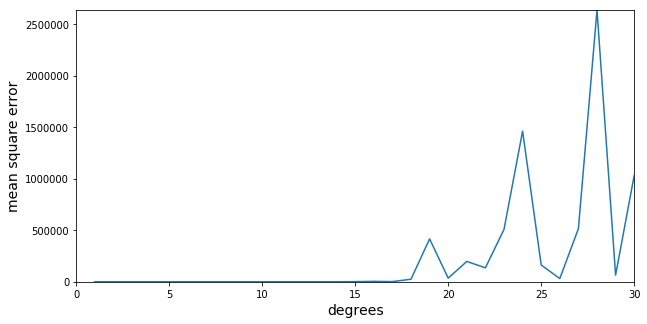

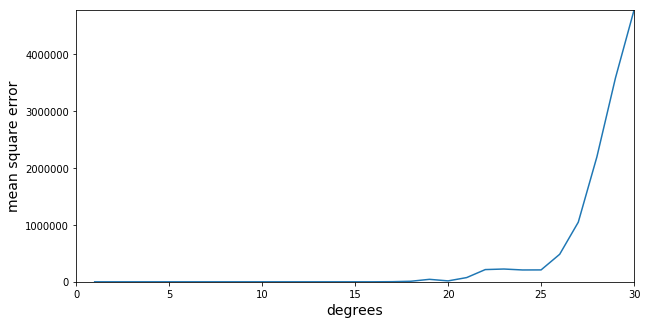

In [11]:
get_MSE(my_first_func, 200, 0.1)
get_MSE(my_second_func, 200, 0.1)

### Conclusion
Using polymial interpolation might be useful, but with bigger degree of polymial, mean square error is growing in exponential rate. Adding bigger noise level, makes plot more unpredictable, with peaks in random places. 